<a href="https://colab.research.google.com/github/ghnp22/Credit-Card-Fraud/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mục lục:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/HK6 - Kiến Tập/3. ThucNghiem/Data/creditcard_2023.csv')

# 1. EDA

In [ ]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
df.set_index(df['id'],inplace=True)
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1


In [ ]:
df.drop(columns='id',inplace=True)

<Axes: >

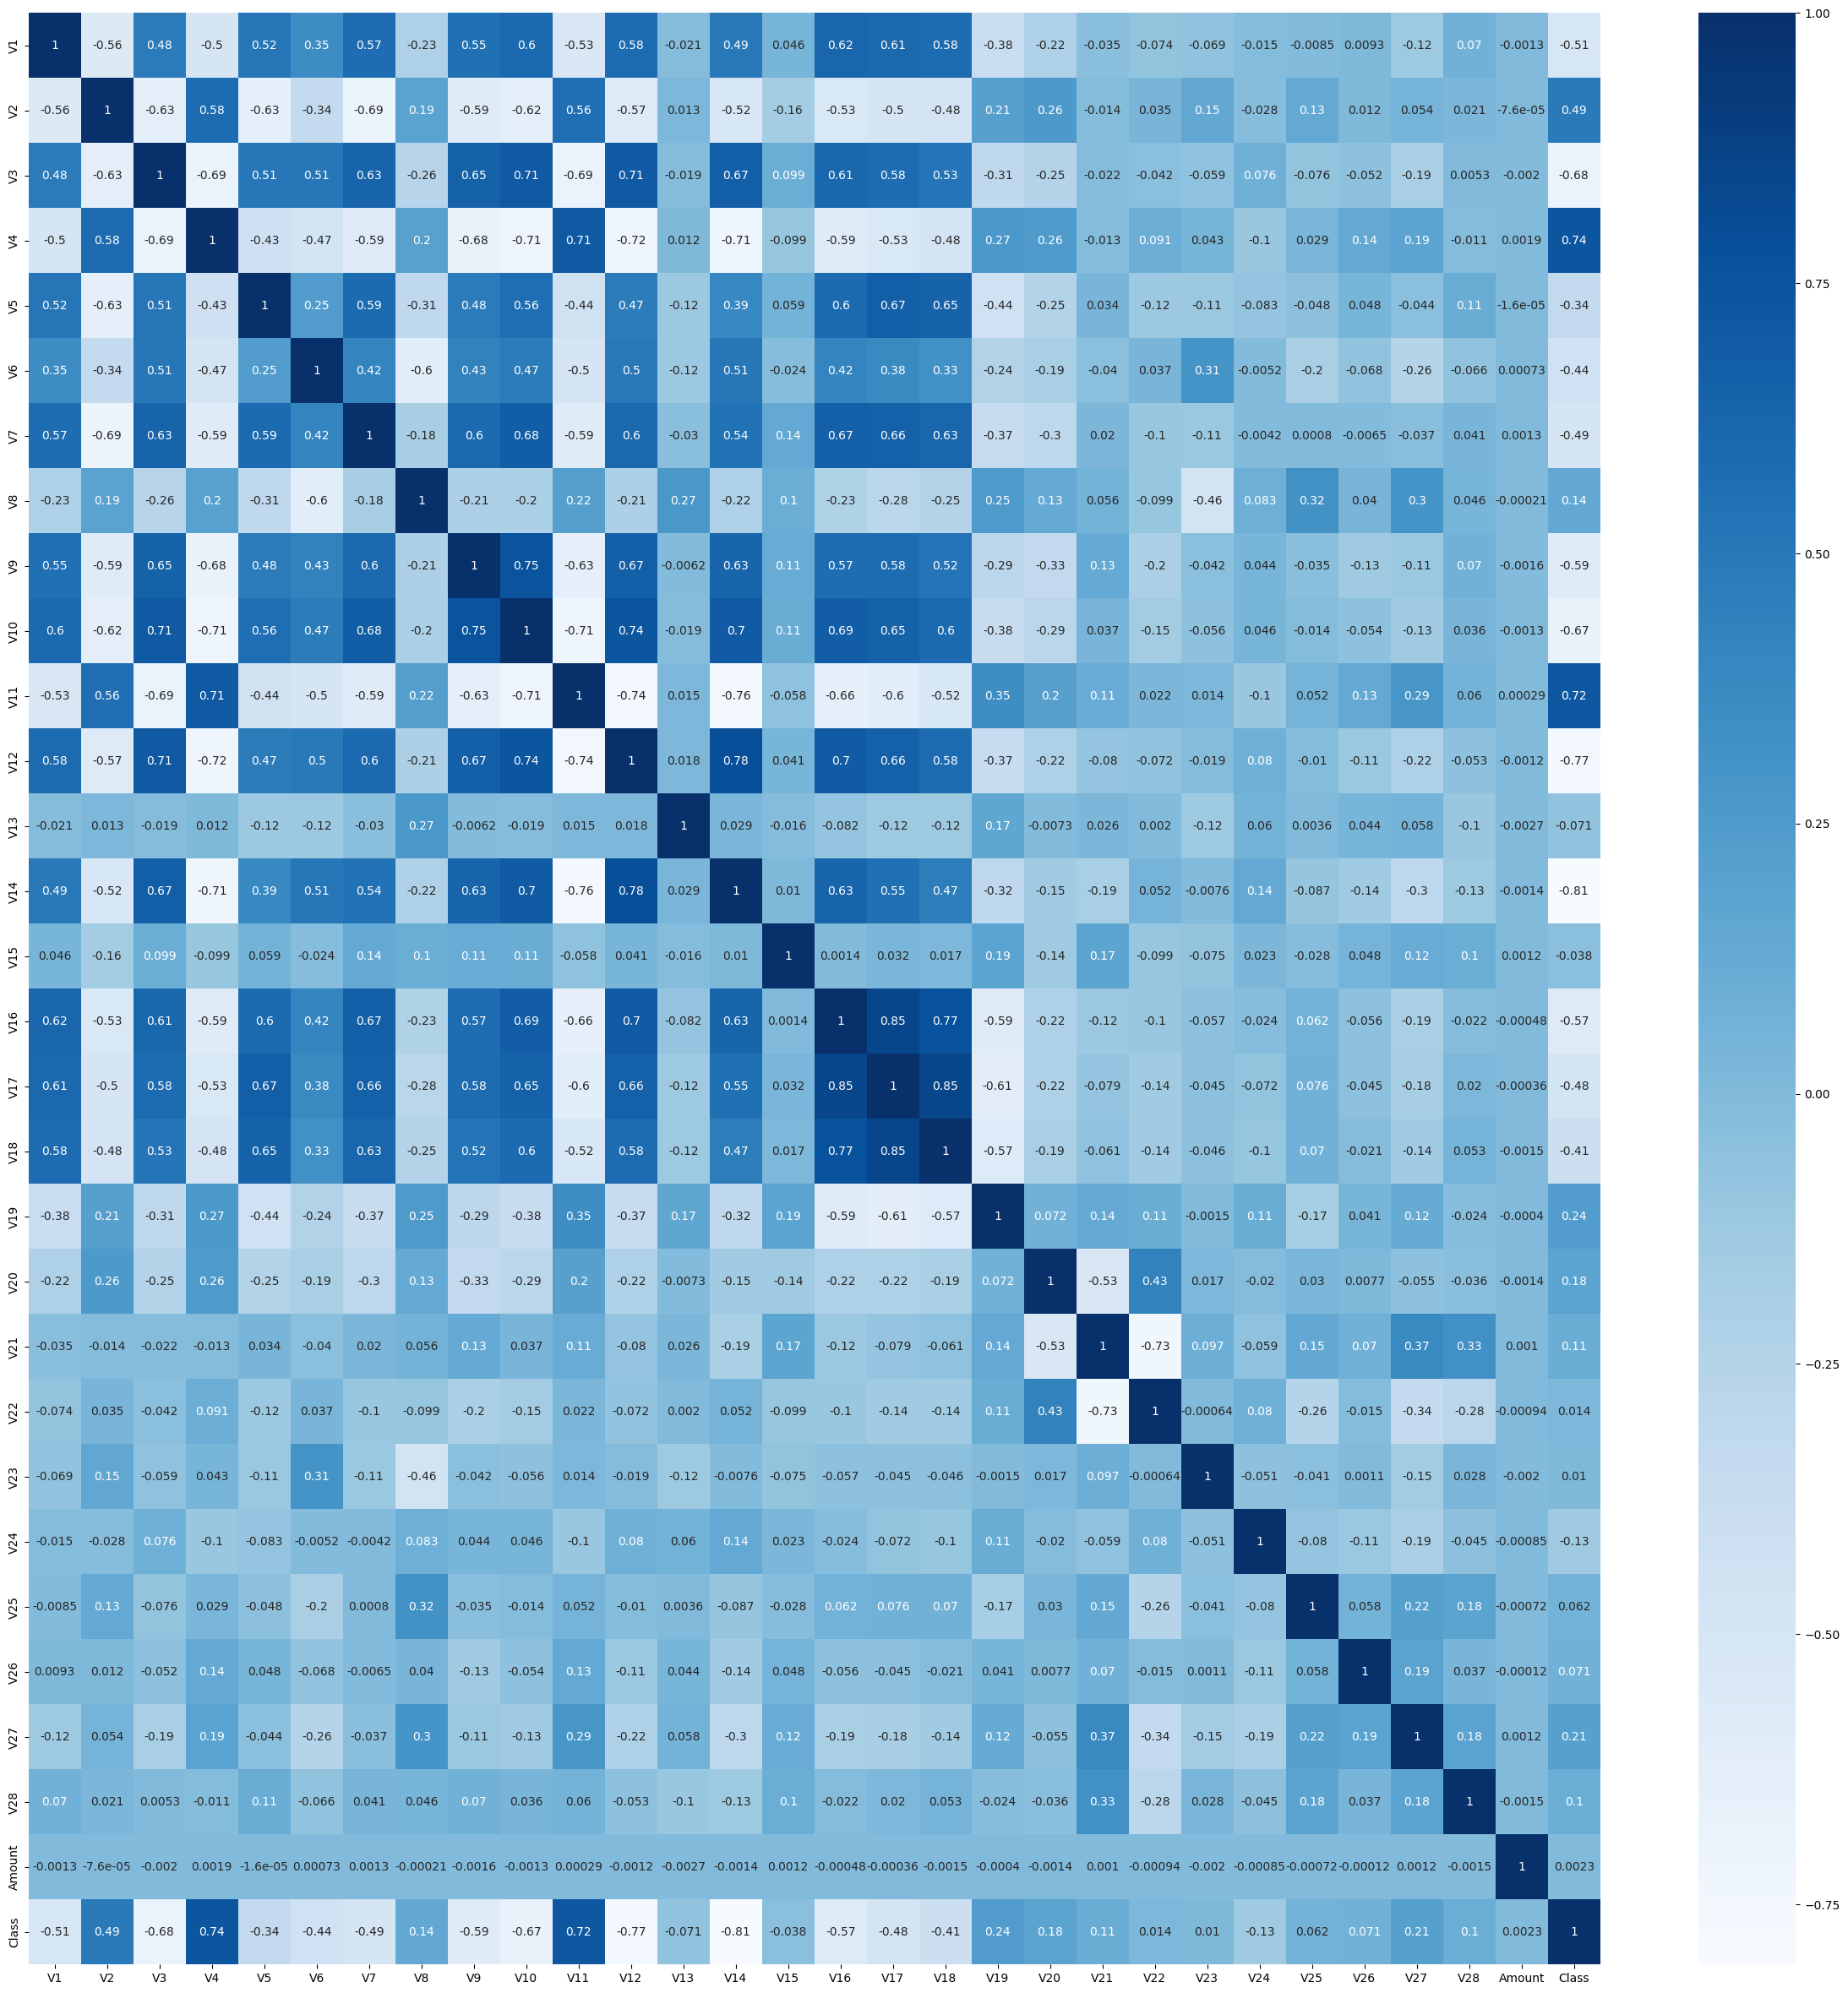

In [ ]:
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(),annot=True, cmap='Blues')

In [ ]:
# x_train=preprocess(x_train)
# x_test =preprocess(x_test)

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
# numeric_column = ['amt','age','city_pop','unix_time']

In [ ]:
# x_train[numeric_column].describe()

In [ ]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
X = df.drop(columns='Class',axis=1)
y = df['Class']

<ipython-input-33-a18b54189f0d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis', stat='percent')


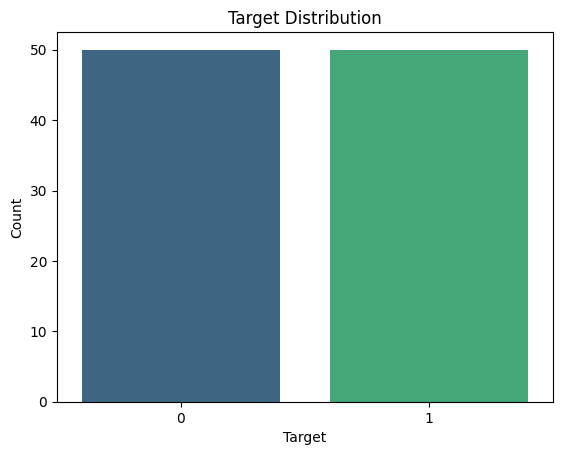

In [ ]:
# prompt: target distribution (use y_train), different color for each value

import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of the target variable
sns.countplot(x=y, palette='viridis', stat='percent')

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution')

# Show the plot
plt.show()

In [ ]:
features = X.columns[:-1]

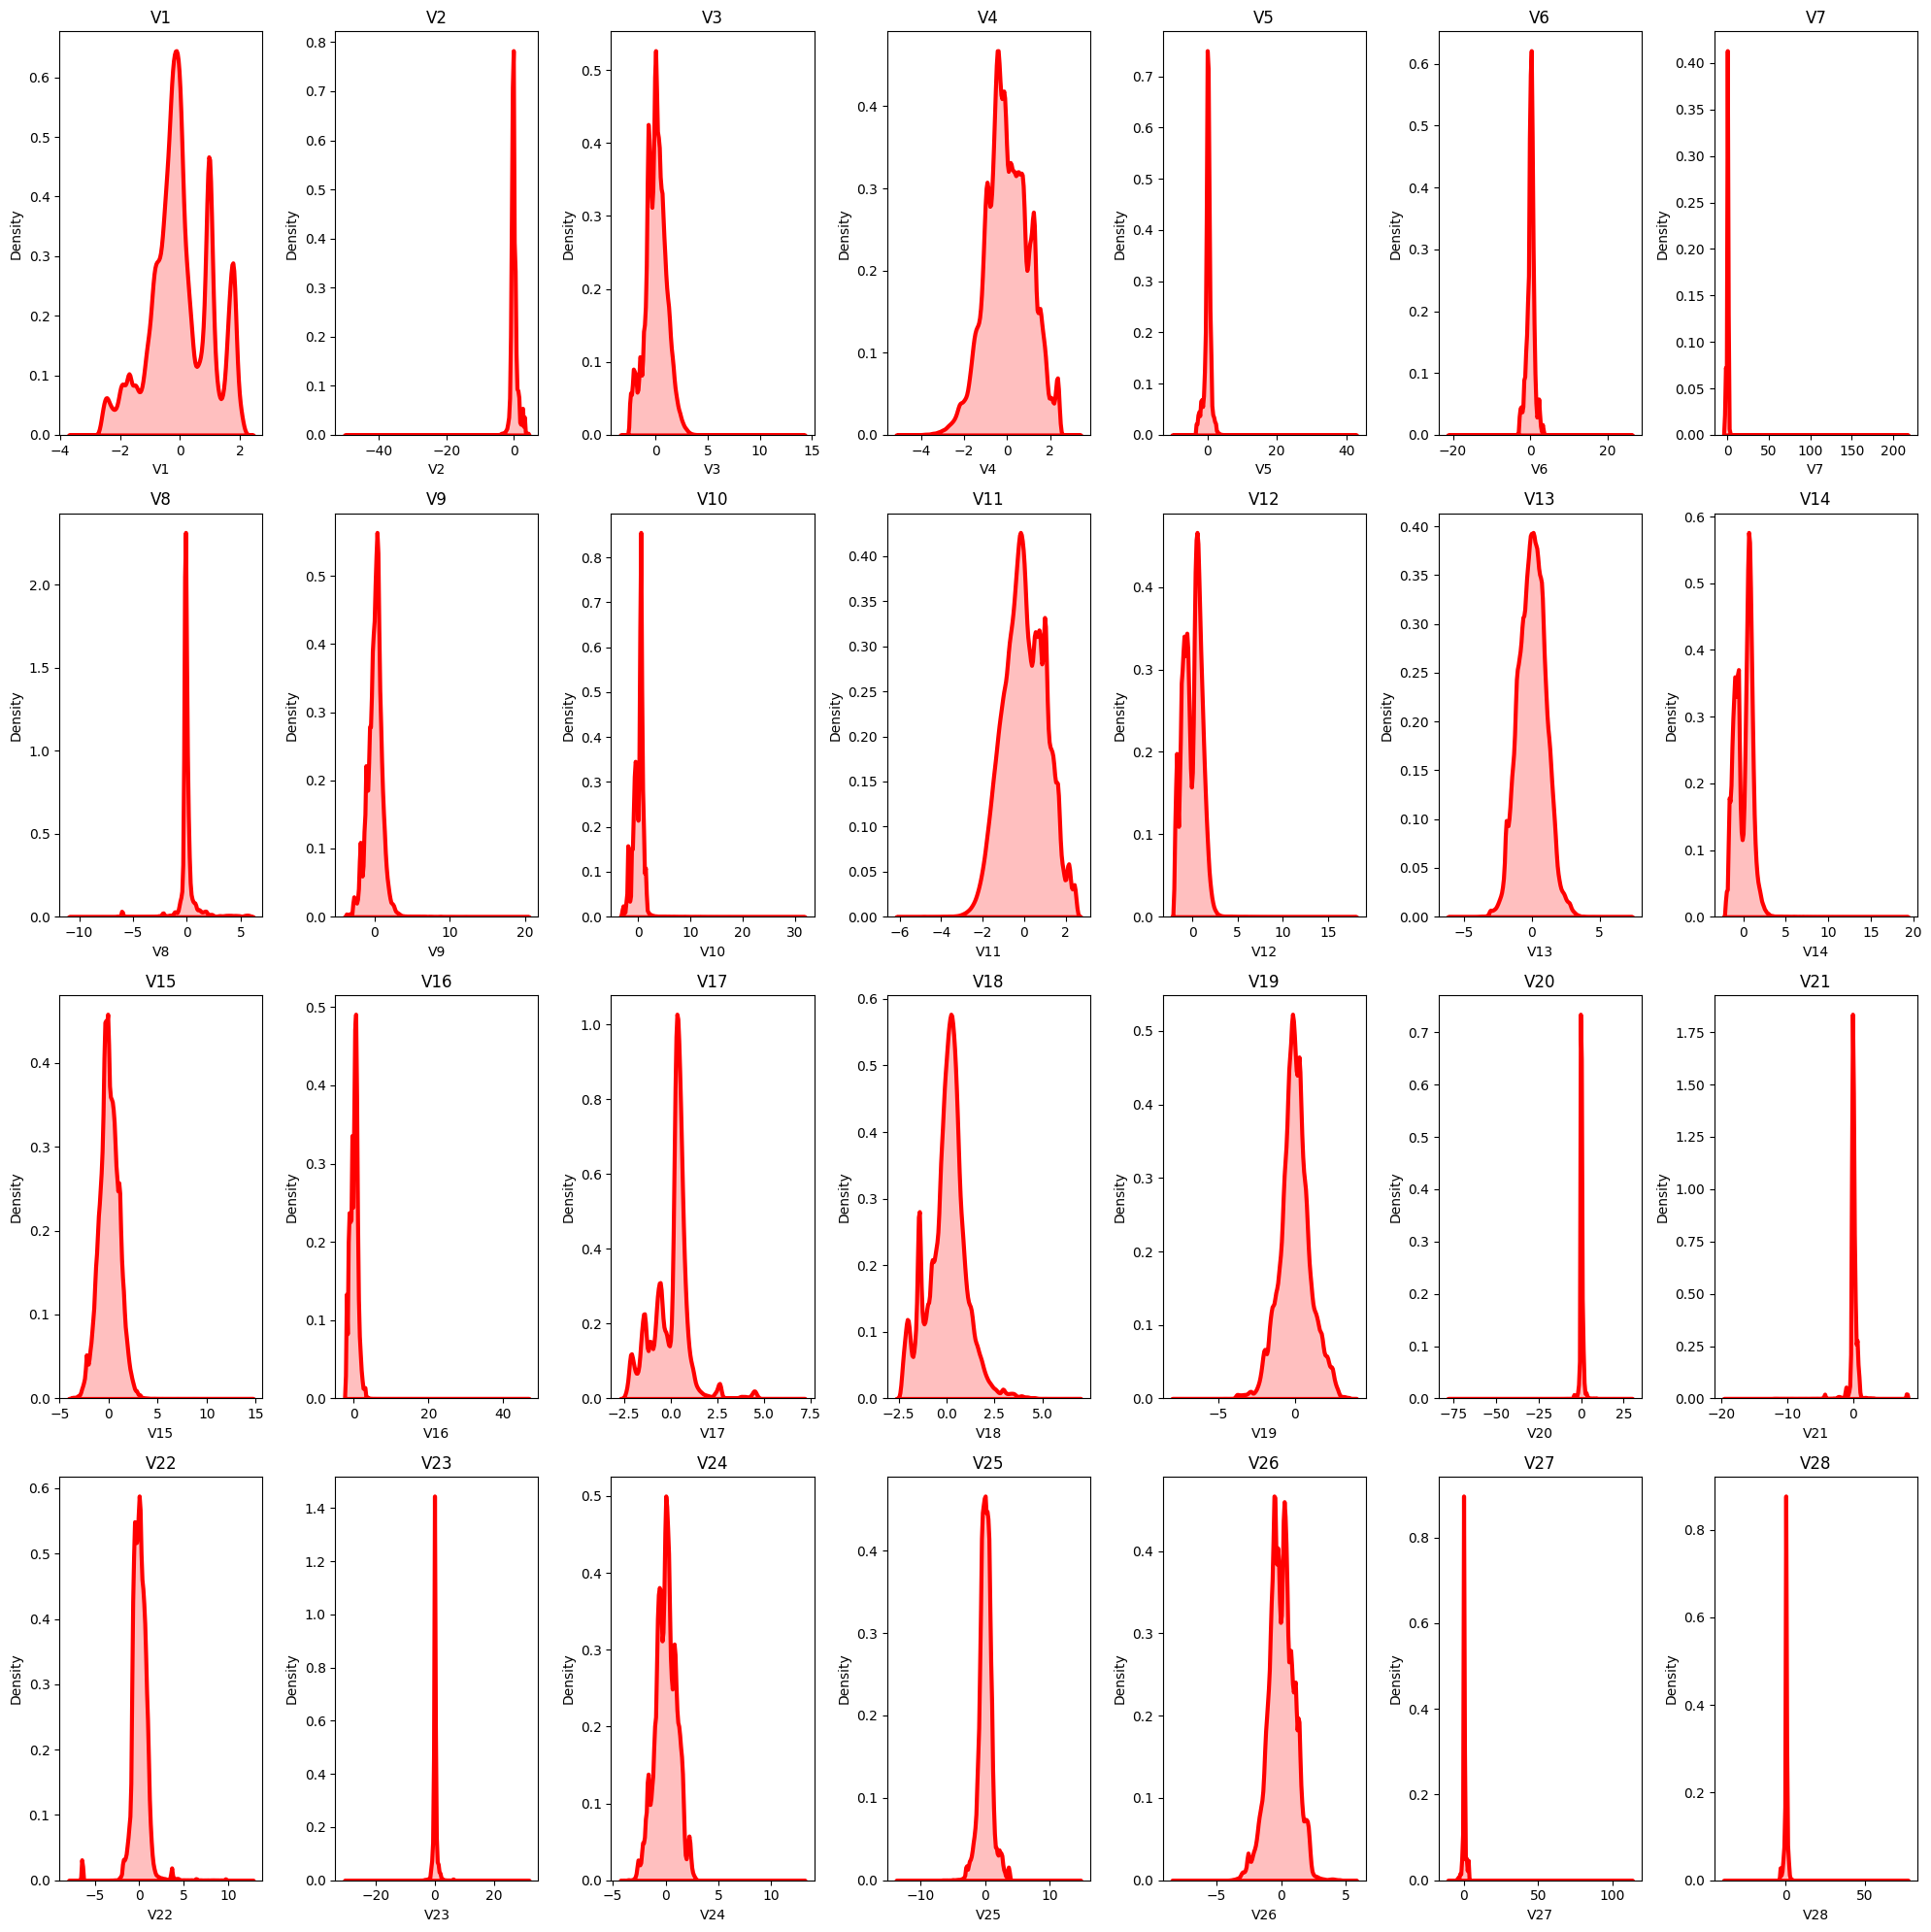

In [ ]:

# Assuming df is your DataFrame and numeric_column is the list of numeric columns
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(20, 20))

# Plot the distribution of each feature for each class
for i, feature in enumerate(features):
    ax = axes[i // 7, i % 7]

    # Plot the distribution for churned users
    sns.kdeplot(data=df.drop(columns=['Class']), x=feature, ax=ax, color='red', fill=True, linewidth=3)
    # Set the title
    ax.set_title(feature)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


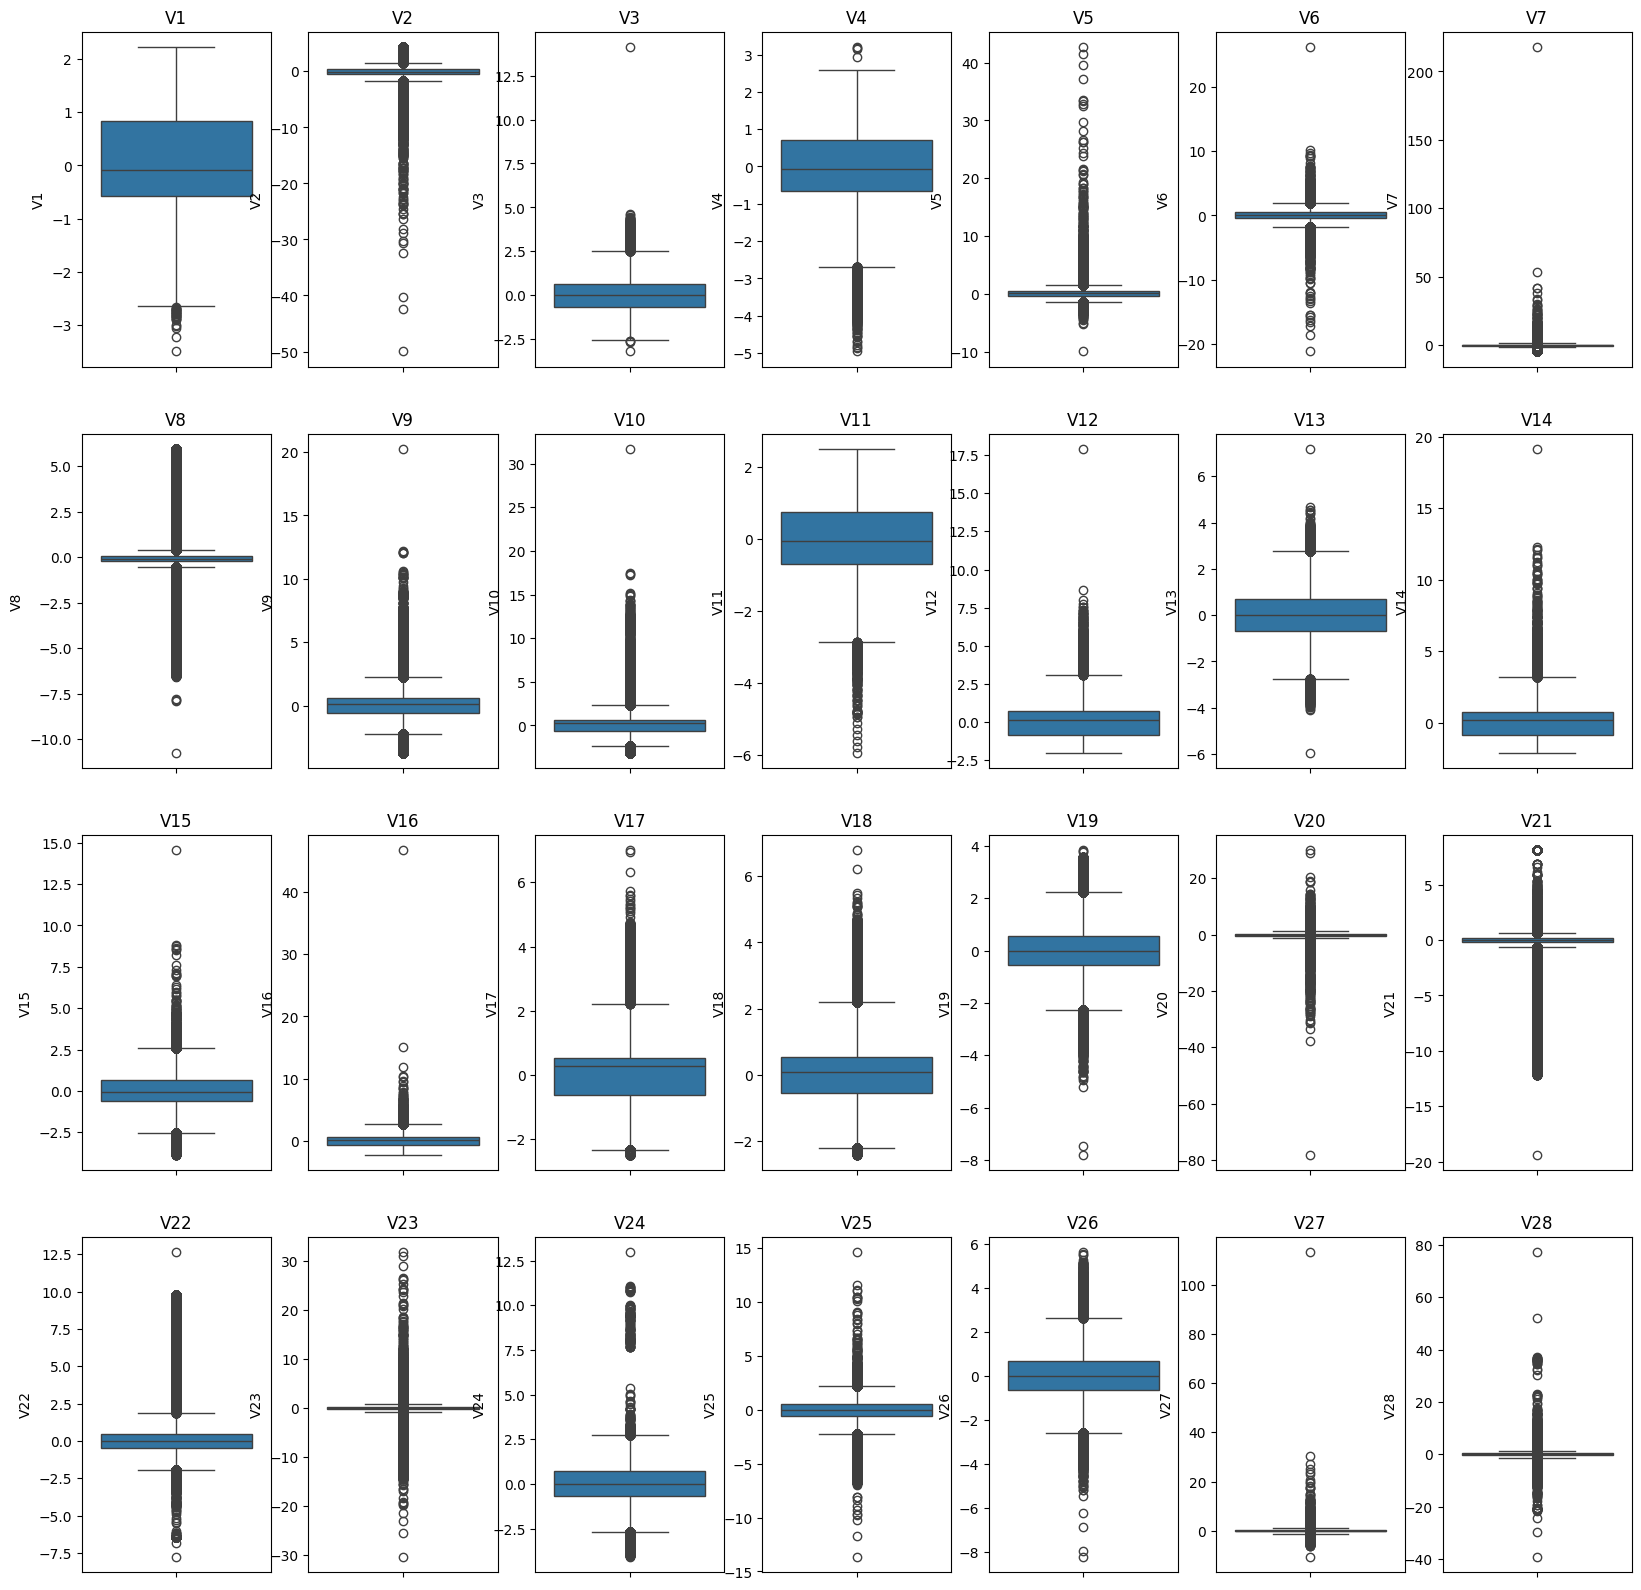

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(20, 20))

# Plot the distribution of each feature for each class
for i, feature in enumerate(features):
    ax = axes[i // 7, i % 7]

    # Plot the distribution for churned users
    sns.boxplot(df[feature],  ax=ax)
    # Set the title
    ax.set_title(feature)

# Show the plot
plt.show()


Kết luận:
Dựa vào distribution & boxplot
- Phân phối ở một số thuộc tính không đều
- Phần lớn các thuộc tính đều có nhiều outliers

Nhận xét: loại bỏ outliers: z-score (trong trường hợp có nhiều outliers), log scale (pp lệch, nhiều outliers -> chỉnh phân phối, giảm số lượng outliers), IQR (ít outliers)

In [ ]:
#Function to replace outliers with mean

def modify_outliers_mean(data,features):

  '''
  This function modifies outliers with mean.
  First, the function detects outliers with Z-score, then calculates the mean of
  the feature without outliers,and finally, replaces outliers with the calculated
  mean.
  Parameters:
  -------------------
  data: dataset to be analyzed
  features: List of numerical features in the dataset
  '''

  to_del=[]
  for i in features:

    #Initialize null lists
    ind_upper=[]
    ind_lower=[]
    ind=[]

    #Calculate Z score
    data['Z_score']=(data[i]-data[i].mean())/data[i].std()
    print(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0],' outliers detected for ',i)
    to_del.append(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0])

    #Identified outliers
    ind=data[(data['Z_score']>3) | (data['Z_score']<-3)].index

    #Calculate mean to replace outlier

    mean_to_replace=data[(data['Z_score']<3) & (data['Z_score']>-3)][i].mean()

    #Replacing outliers
    data.loc[ind,i]=mean_to_replace

  print('total outliers modified: ',sum(to_del))
  data.drop(columns='Z_score',inplace=True)

In [ ]:
 modify_outliers_mean(X, X.columns)

4  outliers detected for  V1
12203  outliers detected for  V2
1274  outliers detected for  V3
1296  outliers detected for  V4
6646  outliers detected for  V5
5888  outliers detected for  V6
7140  outliers detected for  V7
17459  outliers detected for  V8
4644  outliers detected for  V9
3636  outliers detected for  V10
467  outliers detected for  V11
823  outliers detected for  V12
1928  outliers detected for  V13
1372  outliers detected for  V14
2110  outliers detected for  V15
2205  outliers detected for  V16
6069  outliers detected for  V17
4086  outliers detected for  V18
3530  outliers detected for  V19
10646  outliers detected for  V20
10165  outliers detected for  V21
9652  outliers detected for  V22
9656  outliers detected for  V23
513  outliers detected for  V24
7758  outliers detected for  V25
2871  outliers detected for  V26
13337  outliers detected for  V27
12590  outliers detected for  V28
0  outliers detected for  Amount
total outliers modified:  159968


In [ ]:
# # Áp dụng log scale cho tất cả các đặc trưng
# df_log = df.copy()
# for feature in X.columns:
#     # Thêm 1 để tránh log(0) nếu có giá trị 0 trong dữ liệu
#     df_log[feature] = np.log1p(df_log[feature])

# # Tạo figure với lưới 4x7 subplot
# fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(20, 20))

# # Duyệt qua từng đặc trưng trong X.columns
# for i, feature in enumerate(X.columns):
#     # Chọn subplot thích hợp
#     ax = axes[i // 7, i % 7]

#     # Vẽ biểu đồ phân phối cho người dùng đã churn trên thang log
#     sns.kdeplot(x=df_log[feature], color='red', shade=True, linewidth=3, ax=ax)

#     # Đặt tiêu đề cho mỗi subplot
#     ax.set_title(f'Log of {feature}')

# # Điều chỉnh layout để tránh trùng lặp
# plt.tight_layout()

# # Hiển thị biểu đồ
# plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Do phương pháp chi square test cho feature selection cần giá trị lớn hơn 0, nên dùng min-max scaler để các giá trị > 0 (range 0-1)

In [ ]:
import numpy as np
from sklearn.feature_selection import chi2
chi2_stats, p_values = chi2(X_scaled, y)
chi2_stats

array([9.29211186e+03, 5.72252267e+03, 1.75171156e+04, 1.68726517e+04,
       3.30081211e+03, 6.50604234e+03, 6.27166518e+03, 3.49730881e+02,
       9.76067723e+03, 1.31838436e+04, 1.78788802e+04, 3.27139968e+04,
       1.33937305e+02, 3.37380506e+04, 2.93724148e+01, 1.67144015e+04,
       1.14599349e+04, 8.14697549e+03, 2.00070154e+03, 9.21185737e+02,
       4.43614029e+02, 1.95332120e-01, 1.38037029e+00, 5.29585150e+02,
       6.84331312e+01, 1.26871235e+02, 1.68188163e+03, 5.98985034e+02,
       4.83742239e-01])

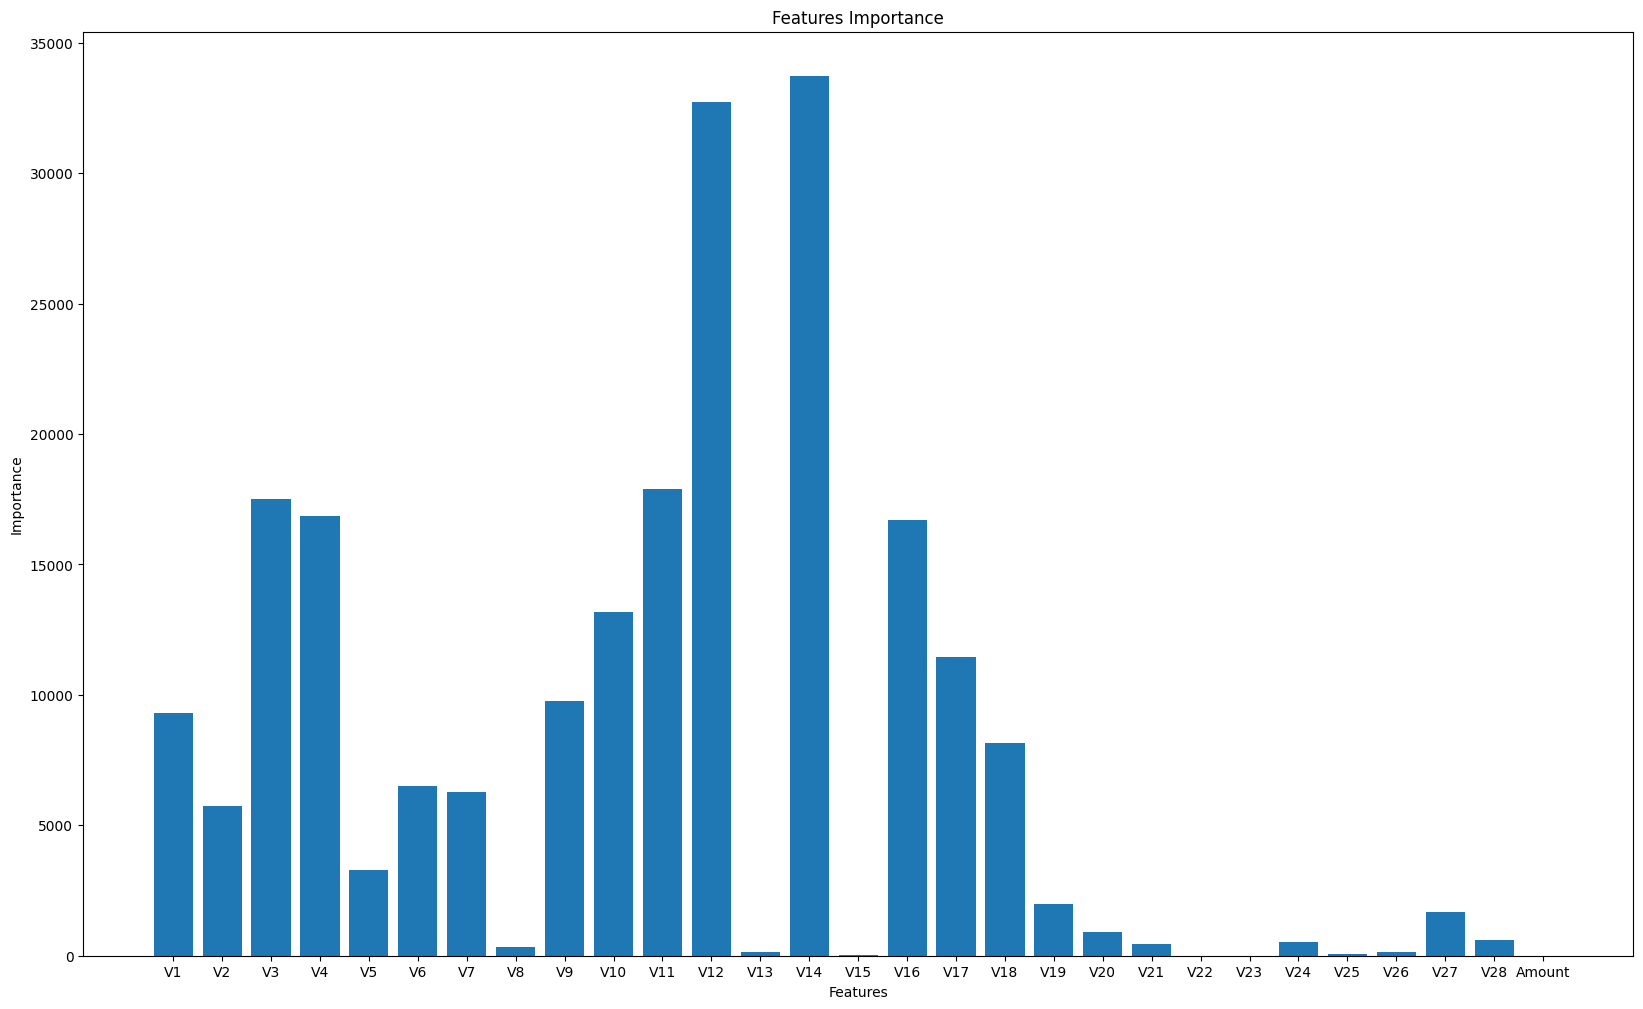

In [ ]:
plt.figure(figsize=(20,12))
plt.bar(X.columns, chi2_stats)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

Lay dac trung 1-7, 9-12, 14, 16-18

In [ ]:
selected_features = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11,
       12, 14, 16, 17, 18]

X_scaled[:,selected_features].shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled[:,selected_features],y, test_size=0.3, random_state=42)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=selected_features)
y_train_df = pd.DataFrame(y_train, columns=['Class'])
X_test_df = pd.DataFrame(X_test, columns=selected_features)
y_test_df = pd.DataFrame(y_test, columns=['Class'])

# Lưu các DataFrame vào file CSV
X_train_df.to_csv("/content/drive/Shareddrives/HK6 - Kiến Tập/3. ThucNghiem/Data/X_train.csv", index=False)
y_train_df.to_csv("/content/drive/Shareddrives/HK6 - Kiến Tập/3. ThucNghiem/Data/y_train.csv", index=False)
X_test_df.to_csv("/content/drive/Shareddrives/HK6 - Kiến Tập/3. ThucNghiem/Data/X_test.csv", index=False)
y_test_df.to_csv("/content/drive/Shareddrives/HK6 - Kiến Tập/3. ThucNghiem/Data/y_test.csv", index=False)